# 의사결정 트리 

# 6.1 Logistic Regression을 활용한 분류 

문제: 와인의 성분(설탕,알콜,산도)을 가지고 와인의 유형(레드,화이트 와인)을 판단하는 모델 학습 및 평가

### 6.1.2 데이터 가져오기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
wine=pd.read_csv("https://bit.ly/wine_csv_data")

In [ ]:
wine.shape

(6497, 4)

In [ ]:
wine.head() 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine["class"].unique()

array([0., 1.])

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


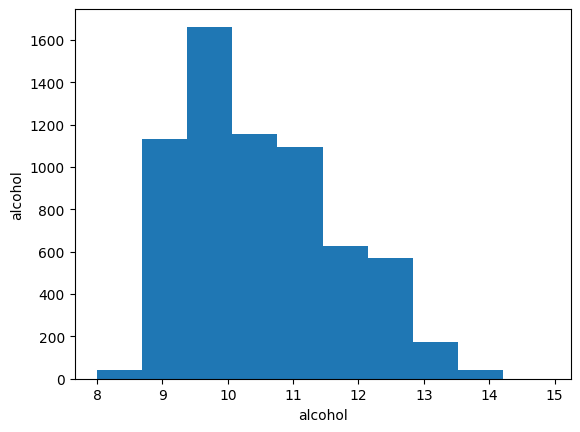

In [ ]:
plt.hist(wine["alcohol"])
plt.xlabel("alcohol")
plt.ylabel("alcohol")
plt.show()

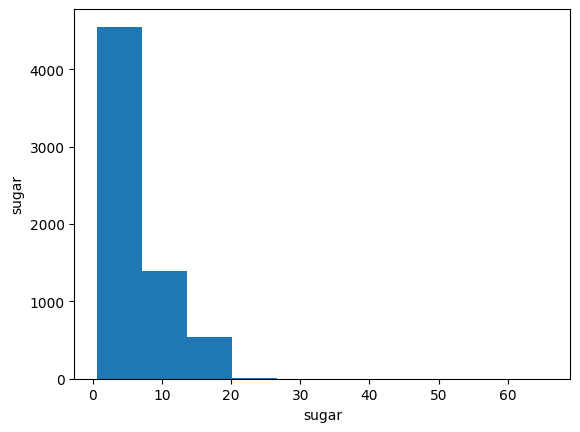

In [ ]:
plt.hist(wine["sugar"])
plt.xlabel("sugar")
plt.ylabel("sugar")
plt.show()


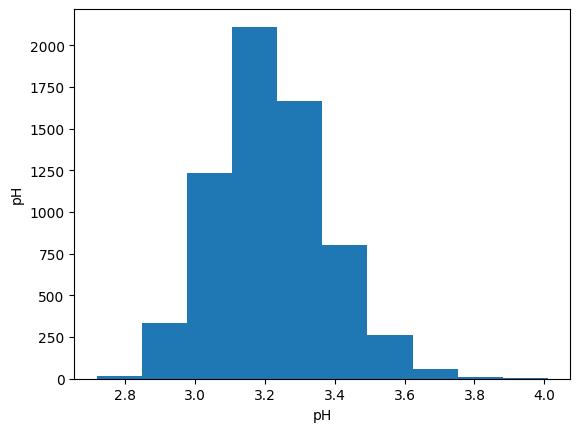

In [ ]:
plt.hist(wine["pH"])
plt.xlabel("pH")
plt.ylabel("pH")
plt.show()

In [ ]:
data=wine[["alcohol","sugar","pH"]].to_numpy()
target=wine["class"].to_numpy()


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =train_test_split(data, target, test_size=0.2, random_state=42)


In [ ]:
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

print(lr.coef_,lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
import pandas as pd
import numpy as np

## 데이터 준비하기 
wine=pd.read_csv("https://bit.ly/wine_csv_data")

wine.describe()


## 데이터 값과 타깃 값을 분류 
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

## 훈련데이터와 테스트 데이터 분류 
from sklearn.model_selection import train_test_split 

train_input,test_input,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=42)


## 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

## 로지스틱 회귀 모델링 
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


0.996921300750433
0.8569230769230769


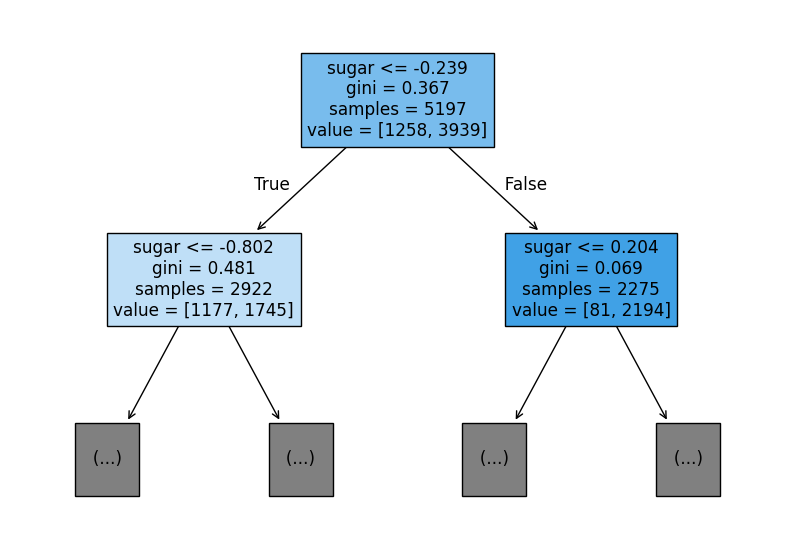

0.8454877814123533
0.8415384615384616


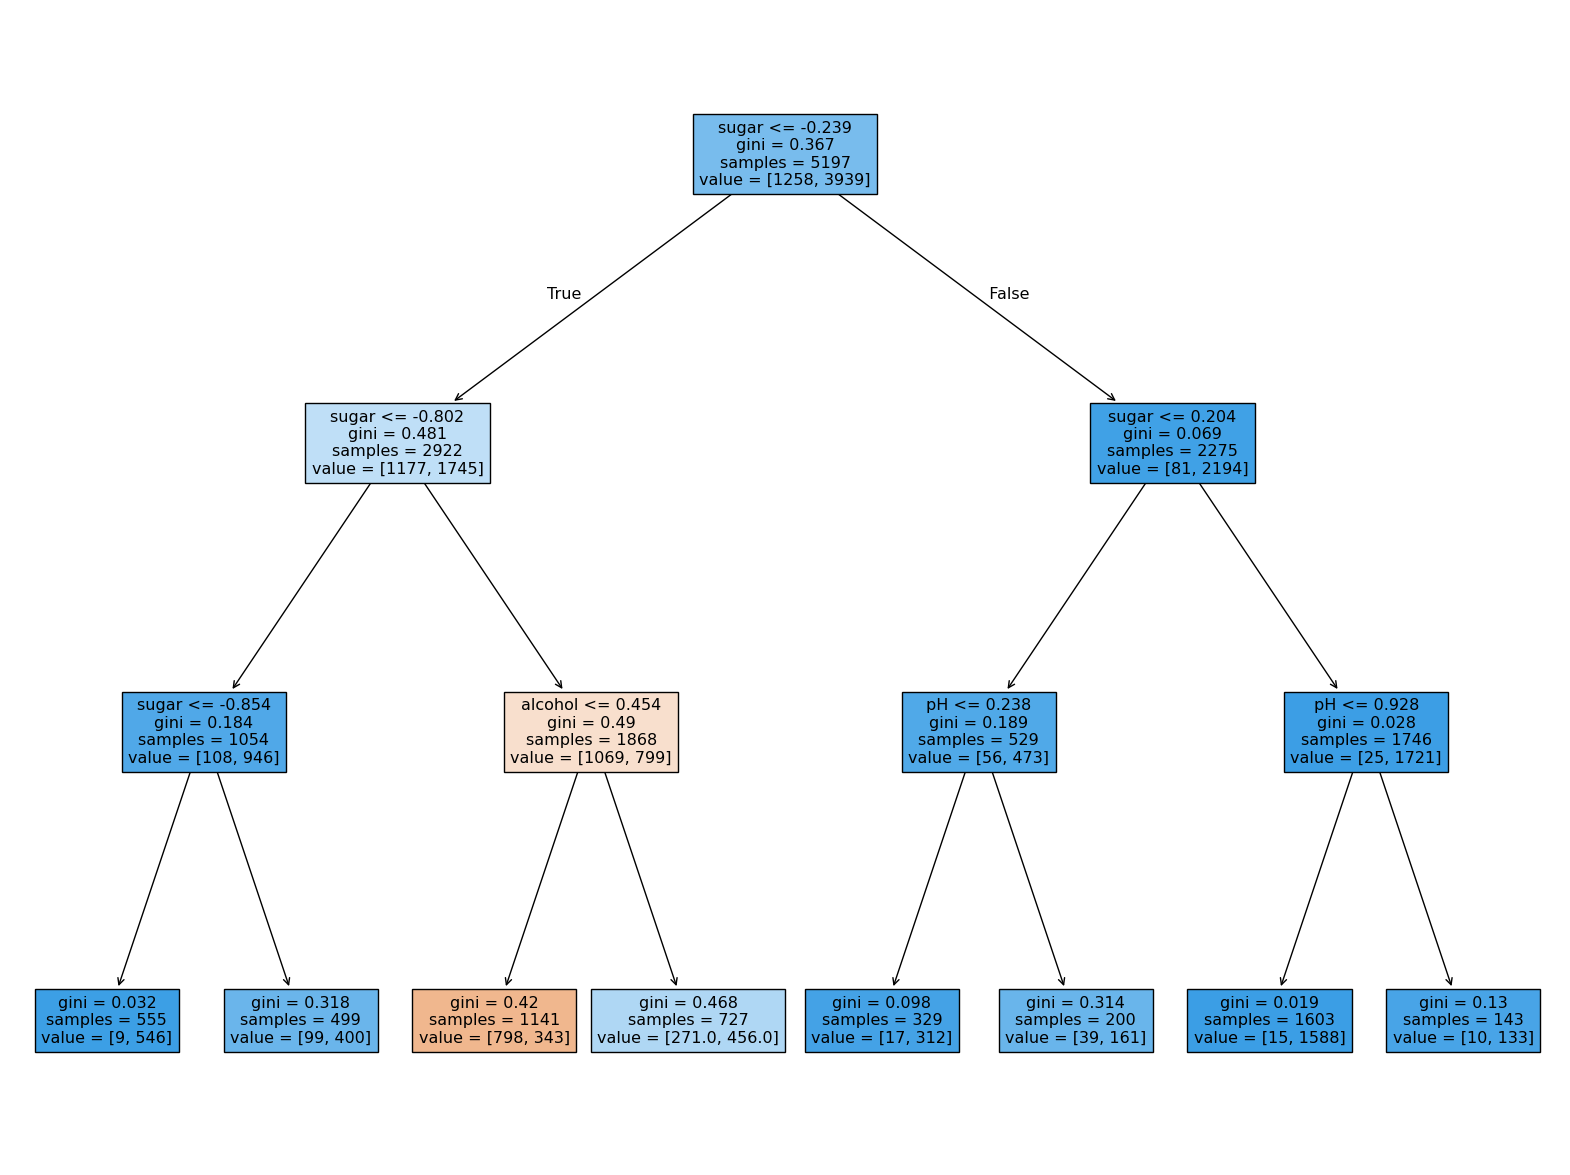

0.8454877814123533
0.8415384615384616


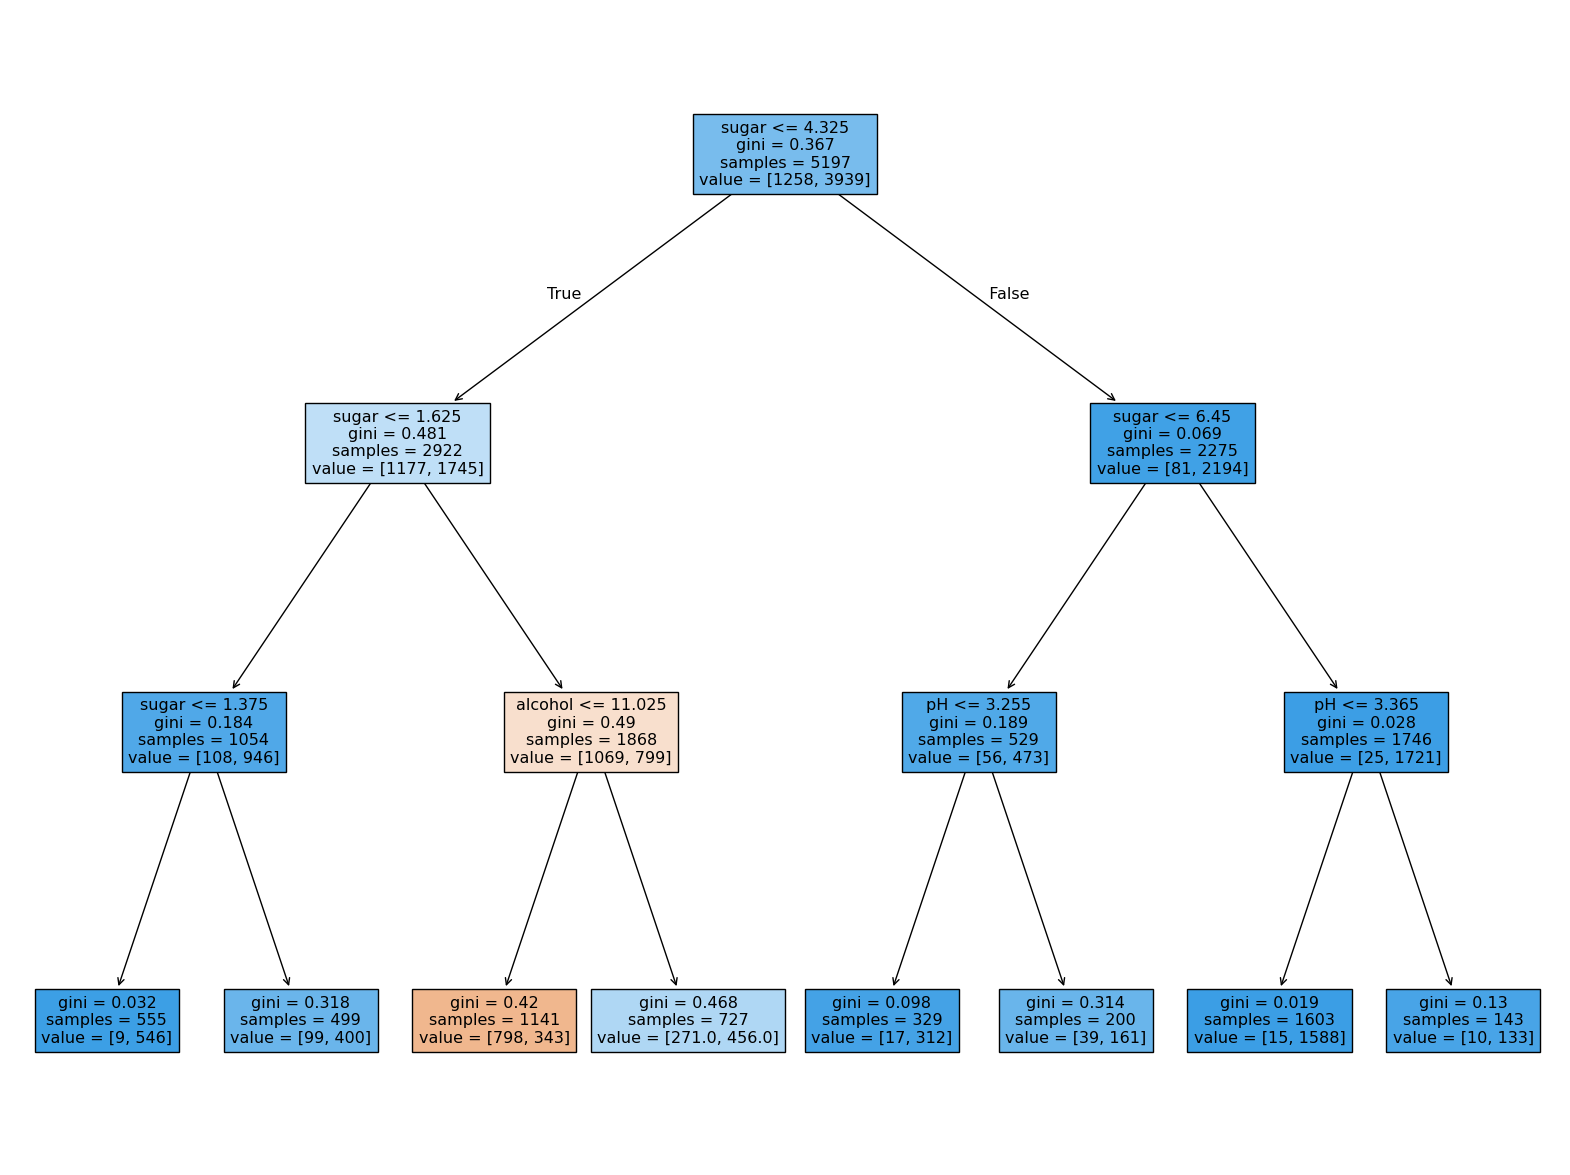

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
## DecisionTreeClassifier 모델링 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled, test_target))


##  깊이가 1인 트리 그래프 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH']) ## filled=True로 지정하면 클래스 마다 색깔을 부여하고 어떤 클래스의 비율이 높아지면 점점 진한색으로 표시가 된다.
plt.show()

## 깊이가 3인 트리 학습 및 시각화 
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=["alcohol",'sugar','pH'])
plt.show()



## 깊이가 3인 트리 학습 및 시각화(데이터 전처리 작업 x)
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))


plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=["alcohol","sugar","pH"])
plt.show()

## 특성 중요도 출력
print(dt.feature_importances_)



In [ ]:
import pandas as pd

wine=pd.read_csv("https://bit.ly/wine_csv_data")

wine.describe()


data= wine[["alcohol",'sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(data,target,test_size=0.2, random_state=42)

train_sub,var_sub_sub,sub_target,var_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


